In [4]:
# Librairies
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt

path ="/home/gleprince/Documents/Certificat/Projet_2/starting_kit/sample_data"
data = pd.read_csv(path+"/store_train.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])

In [5]:
data.head()

,ID,day,date,nb_customer,open,promo,state,school
0,874,4,2014-12-18,653,1,1,0,0
1,244,1,2013-08-19,448,1,0,0,1
2,222,2,2014-06-10,627,1,0,0,0
3,655,5,2013-04-05,545,1,0,0,1
4,806,4,2013-12-19,729,1,1,0,0


In [6]:
data.dtypes

ID              int64
day             int64
date           object
nb_customer     int64
open            int64
promo           int64
state          object
school          int64
dtype: object

In [7]:
data["date"]=pd.Categorical(data["date"],ordered=False)
data["state"]=pd.Categorical(data["state"],ordered=False)

In [8]:
data_extract=pd.get_dummies(data[["state"]])
rest=data[["ID","day","date","nb_customer","open","promo","school"]]
ddata=pd.concat([data_extract,rest],axis=1)
ddata.head()

,state_0,state_a,state_b,state_c,ID,day,date,nb_customer,open,promo,school
0,1,0,0,0,874,4,2014-12-18,653,1,1,0
1,1,0,0,0,244,1,2013-08-19,448,1,0,1
2,1,0,0,0,222,2,2014-06-10,627,1,0,0
3,1,0,0,0,655,5,2013-04-05,545,1,0,1
4,1,0,0,0,806,4,2013-12-19,729,1,1,0


In [9]:
ddata["state_0"]=pd.DataFrame(ddata["state_0"], dtype=int)
ddata["state_a"]=pd.DataFrame(ddata["state_a"], dtype=int)
ddata["state_b"]=pd.DataFrame(ddata["state_b"], dtype=int)
ddata["state_c"]=pd.DataFrame(ddata["state_c"], dtype=int)
ddata.dtypes
        

state_0           int64
state_a           int64
state_b           int64
state_c           int64
ID                int64
day               int64
date           category
nb_customer       int64
open              int64
promo             int64
school            int64
dtype: object

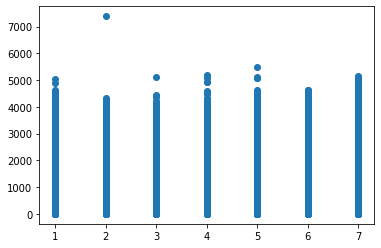

In [10]:
plt.scatter(data["day"],data["nb_customer"])
plt.show()

# ACP

In [11]:
# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(ddata[["nb_customer","day","open","state_0","state_a","state_b","state_c","school","promo"]])

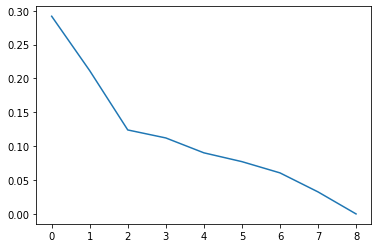

In [12]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [13]:
print(pca.explained_variance_ratio_)

[2.91851830e-01 2.11476376e-01 1.23972456e-01 1.12168200e-01
 9.02125196e-02 7.71901284e-02 6.06005508e-02 3.25279391e-02
 1.06889385e-29]


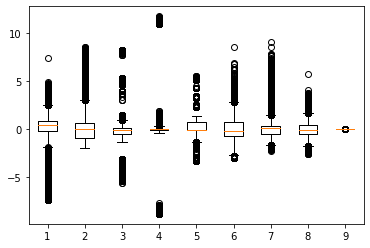

In [14]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

In [15]:
ex_variance=np.var(C,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio) 


[2.91851830e-01 2.11476376e-01 1.23972456e-01 1.12168200e-01
 9.02125196e-02 7.71901284e-02 6.06005508e-02 3.25279391e-02
 1.11115165e-29]


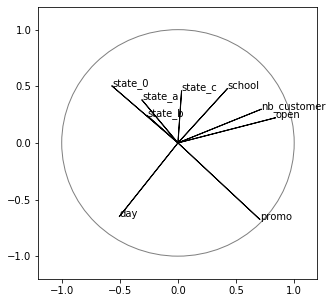

In [16]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, ddata[["nb_customer","day","open","promo","state_0","state_a","state_b","state_c","school"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# APPRENTISSAGE


In [31]:
# Variables explicatives sur les données train
data_extract=pd.get_dummies(data[["state"]])
rest=data[["ID","day","nb_customer","open","promo","school"]]
data_train=pd.concat([data_extract,rest],axis=1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 10 columns):
state_0        712046 non-null uint8
state_a        712046 non-null uint8
state_b        712046 non-null uint8
state_c        712046 non-null uint8
ID             712046 non-null int64
day            712046 non-null int64
nb_customer    712046 non-null int64
open           712046 non-null int64
promo          712046 non-null int64
school         712046 non-null int64
dtypes: int64(6), uint8(4)
memory usage: 35.3 MB


In [32]:
#extraction données solution
sol = pd.read_csv(path+"/store_train.solution",sep=" ",names = ['sales'])

# variable à expliquer réelle
Yr_train=sol["sales"]
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 1 columns):
sales    712046 non-null int64
dtypes: int64(1)
memory usage: 5.4 MB


In [33]:
#extraction données test
ddata_test = pd.read_csv(path+"/store_test.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])


ddat=pd.get_dummies(ddata_test[["state"]])
rest_5=ddata_test[["ID","day","nb_customer","open","promo","school"]]
data_test=pd.concat([ddat,rest_5],axis=1)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203441 entries, 0 to 203440
Data columns (total 10 columns):
state_0        203441 non-null uint8
state_a        203441 non-null uint8
state_b        203441 non-null uint8
state_c        203441 non-null uint8
ID             203441 non-null int64
day            203441 non-null int64
nb_customer    203441 non-null int64
open           203441 non-null int64
promo          203441 non-null int64
school         203441 non-null int64
dtypes: int64(6), uint8(4)
memory usage: 10.1 MB


In [34]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso.fit(data_train,sol)
prevision=regLasso.predict(data_test)

In [35]:
print(len(prevision))

203441


In [38]:
#  mise en forme du FICHIER DE SORTIE pour l'UPLOAD
# Lk

np.savetxt('/home/gleprince/Documents/Certificat/Projet_2/starting_kit/sample_data/scores.txt', prevision, fmt='%d')

## tentative d'entrainement supplémentaire en splittant



In [172]:
from sklearn.model_selection import train_test_split  

size_test = 300000 # taille de la partition de test
X_train,X_test,Yr_train,Yr_test=train_test_split(data_train,Yr_train,test_size=size_test,random_state=11)

In [173]:
#NORMALISATION

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

In [174]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412046 entries, 443906 to 403353
Data columns (total 10 columns):
state_0        412046 non-null uint8
state_a        412046 non-null uint8
state_b        412046 non-null uint8
state_c        412046 non-null uint8
ID             412046 non-null int64
day            412046 non-null int64
nb_customer    412046 non-null int64
open           412046 non-null int64
promo          412046 non-null int64
school         412046 non-null int64
dtypes: int64(6), uint8(4)
memory usage: 23.6 MB


In [175]:
#RESHAPE pour bien spécifier nombre de ligne et de colonnes
Xr_train=Xr_train.reshape((len(data_train)-size_test,10))
Xr_test=Xr_test.reshape((size_test,10))

## regression linéaire


In [176]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 14324827.342689784


In [177]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= -2.3266713500280645e-05


In [178]:
model_lasso=regLasso.fit(X_train,Yr_train)
model_lasso.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  0.01220503,
        4.32593522,  0.01651244, -0.        , -1.88313609, -4.29358572])

In [179]:
coef = pd.Series(model_lasso.coef_, index = data_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 5 variables et en supprime 5


Text(0.5, 1.0, 'Coefficients du modèle lasso')

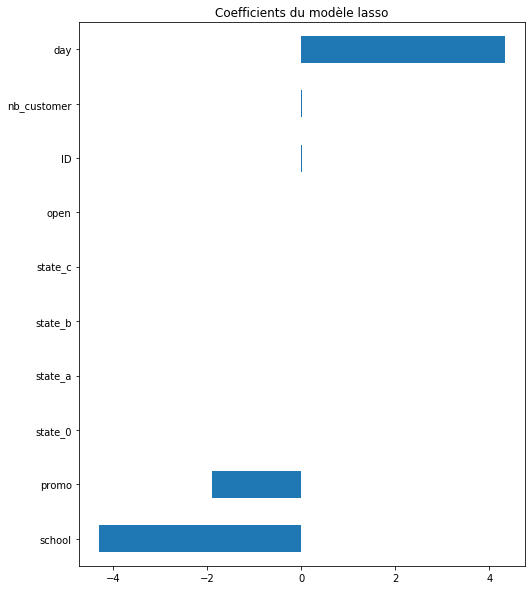

In [180]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

## arbre binaire